In [12]:
import sklearn as sk
import sklearn.covariance as cov
import pandas as pd
import numpy as np
import ggplot as gg

train_original = pd.DataFrame.from_csv("cleaned_train.csv")
data = train_original.copy()

train = data.as_matrix()
names = data.columns

In [13]:
# Scale some features correctly
#data['OverallQual'] = train_original['OverallQual'].apply(lambda x:x**3)

# Drop features with low variance
import sklearn.feature_selection as sel

thredsh = sel.VarianceThreshold(threshold=0.003) # comparing with plots  0.003 seems to be a good threshold
thredsh.fit(train)
deselected = ~thredsh.get_support()
data = data.drop(names[deselected],axis=1)

# regenerate matrix
train = data.as_matrix()
names = data.columns

In [14]:
import sklearn.preprocessing as pre

# scale all
scaler = pre.RobustScaler()
train = scaler.fit_transform(train)

In [15]:
import sklearn.covariance as cov

lw = cov.LedoitWolf()
lw.fit(train)
cov_matrix = lw.covariance_

In [16]:
cor = np.corrcoef(cov_matrix)

relevance = cor[:,0]
sort = np.argsort(np.absolute(relevance))[::-1]
list(zip(relevance[sort],names[sort]))[:20]

[(1.0, 'SalePrice'),
 (-0.014074372448736617, 'EnclosedPorch'),
 (-0.012725643905124649, 'MiscVal'),
 (-0.0068432475732585684, 'BsmtFinSF2'),
 (-0.0068302645825528479, 'LowQualFinSF'),
 (-0.0059748399195204624, 'BsmtQual'),
 (-0.0059586993985782334, 'KitchenQual'),
 (-0.0058523858000828237, 'ExterQual'),
 (-0.0058362683342093567, 'GarageFinish'),
 (-0.0056929034232205081, 'BsmtExposure'),
 (-0.005674039878591307, 'OverallCond'),
 (-0.005535945104607057, 'Foundation CBlock'),
 (-0.0055256093756787016, 'MasVnrType None'),
 (-0.0055170883209201705, 'HeatingQC'),
 (-0.0054076325844473645, 'PavedDrive'),
 (-0.0053928111635244847, 'Functional'),
 (-0.0053465221027006026, 'Neighborhood NAmes'),
 (-0.0053218200944852925, 'GarageType Detchd'),
 (-0.0053034557965894622, 'Exterior1st MetalSd'),
 (-0.0052998017396319189, 'Exterior2nd MetalSd')]

In [17]:
# Correlation Control:
# check whether correlation should be positiv or negativ

pos_cor = ['SalePrice','LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
           'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr',
           'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
           'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal','OverallQual',
           'OverallCond','GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'
          ]

neg_cor = ['Utilities','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','HeatingQC',
          'KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','GarageCond','PavedDrive',
           'PoolQC','Fence'
          ]

unsure_cor = ['BsmtExposure','BsmtUnfSF',  
                     'LowQualFinSF']

c = dict(zip(names,relevance))

for item in pos_cor:
    if c[item]<=0:
        print("Wrong correlation for",item,c[item])

for item in neg_cor:
    if c[item]>=0:
        print("Wrong correlation for",item,c[item])

Wrong correlation for LotFrontage -0.00464669849292
Wrong correlation for LotArea -0.00485334599148
Wrong correlation for YearBuilt -0.0043374121898
Wrong correlation for YearRemodAdd -0.00459265581941
Wrong correlation for MasVnrArea -0.00408375092057
Wrong correlation for BsmtFinSF1 -0.00471359790376
Wrong correlation for BsmtFinSF2 -0.00684324757326
Wrong correlation for TotalBsmtSF -0.00431628918364
Wrong correlation for 1stFlrSF -0.00443227780184
Wrong correlation for 2ndFlrSF -0.0048716222142
Wrong correlation for BedroomAbvGr -0.00498283946835
Wrong correlation for KitchenAbvGr -0.00521507373869
Wrong correlation for TotRmsAbvGrd -0.00460844451906
Wrong correlation for Fireplaces -0.00471354396074
Wrong correlation for GarageYrBlt -0.00447096439459
Wrong correlation for GarageCars -0.0041931396314
Wrong correlation for GarageArea -0.00414632859812
Wrong correlation for WoodDeckSF -0.0047242234059
Wrong correlation for OpenPorchSF -0.00455867702074
Wrong correlation for EnclosedP

KeyError: 'Utilities'

In [18]:
# Split the data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

labels = train[:,0]
features = train[:,1:]

x_train, x_test, y_train, y_test = train_test_split(features,labels,test_size=0.2)

In [53]:
from sklearn import ensemble


    #fitter = sk.linear_model.Ridge(alpha=alpha)
    #fitter = sk.linear_model.Lasso(alpha=alpha) #sk.svm.SVR(kernel="linear")
    #fitter = ensemble.RandomForestRegressor()
fitter = ensemble.GradientBoostingRegressor(
    n_estimators=1800,max_leaf_nodes=10,learning_rate=0.005, random_state=1337, loss='ls')
    
scores = cross_val_score(fitter,features,labels,cv=10,scoring='neg_mean_squared_error',n_jobs=4)
print("RMSE: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))



RMSE: -0.09157 (+/- 0.08818)


In [47]:
scores

array([-0.06776075, -0.09412526, -0.06722838, -0.15335372, -0.12388131,
       -0.08456814, -0.06680794, -0.07604465, -0.15568307, -0.0868836 ])

n_est = 1800: RMSE: -0.09080 (+/- 0.08487) (10)

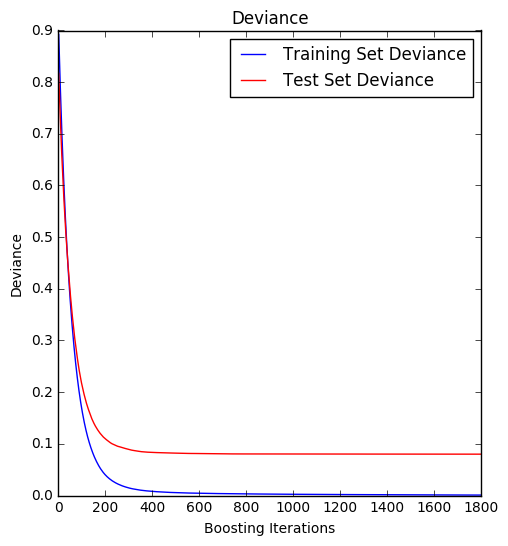

In [45]:
import matplotlib.pyplot as plt

n_est = 1800
fitter = ensemble.GradientBoostingRegressor(
    n_estimators=n_est,max_depth=6,learning_rate=0.01, random_state=1337, loss='ls')
fitter.fit(x_train,y_train)

test_score = np.zeros(n_est, dtype=np.float64)
for i, y_pred in enumerate(fitter.staged_predict(x_test)):
    test_score[i] = fitter.loss_(y_test, y_pred)
    
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(n_est) + 1, fitter.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(n_est) + 1, test_score, 'r-', label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
plt.show()

In [30]:
gg.qplot()

array([-0.07815517, -0.11695183, -0.08638985, -0.15433835, -0.15930437,
       -0.1051224 , -0.08926952, -0.09329024, -0.17814508, -0.10443452])

In [54]:
fitter = ensemble.GradientBoostingRegressor(
    n_estimators=1800,max_leaf_nodes=10,learning_rate=0.005, random_state=1337, loss='ls')
fitter.fit(features,labels)
importance = fitter.feature_importances_
sort = np.argsort(importance)[::-1]
list(zip(importance[sort],names[1:][sort]))[:15]

[(0.10426104305694897, 'GrLivArea'),
 (0.092618133846590442, 'OverallQual'),
 (0.052238027446606571, 'LotArea'),
 (0.049666377517900873, 'TotalBsmtSF'),
 (0.042418348106561164, 'BsmtFinSF1'),
 (0.035007655564486886, 'OverallCond'),
 (0.033325211586767642, 'GarageArea'),
 (0.030082578482415044, '1stFlrSF'),
 (0.025395212882348989, 'YearRemodAdd'),
 (0.023748653604510679, 'YearBuilt'),
 (0.022906538834581564, 'GarageYrBlt'),
 (0.021092447622949987, 'LotFrontage'),
 (0.017823961624536276, 'KitchenQual'),
 (0.017585063462330686, 'BsmtUnfSF'),
 (0.016975144010283674, 'OpenPorchSF')]

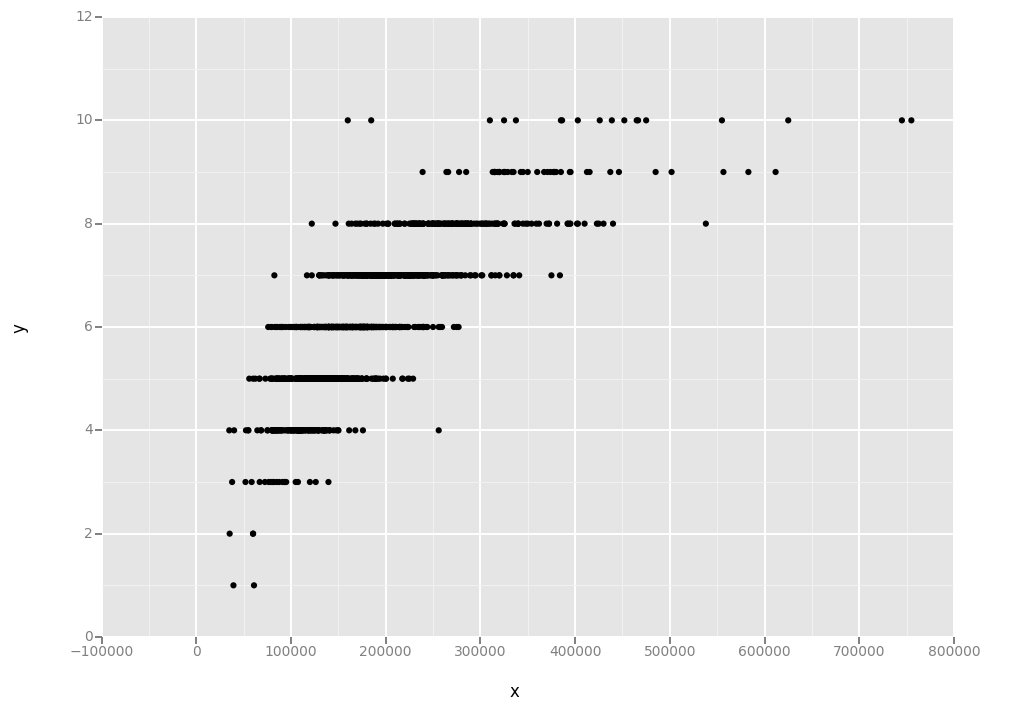

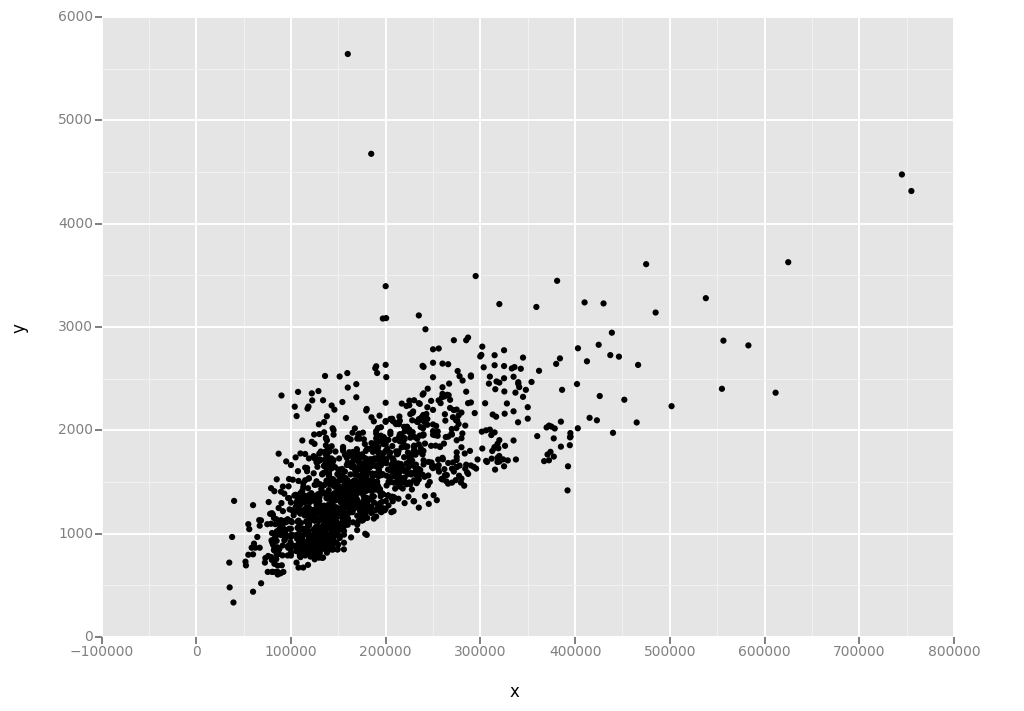

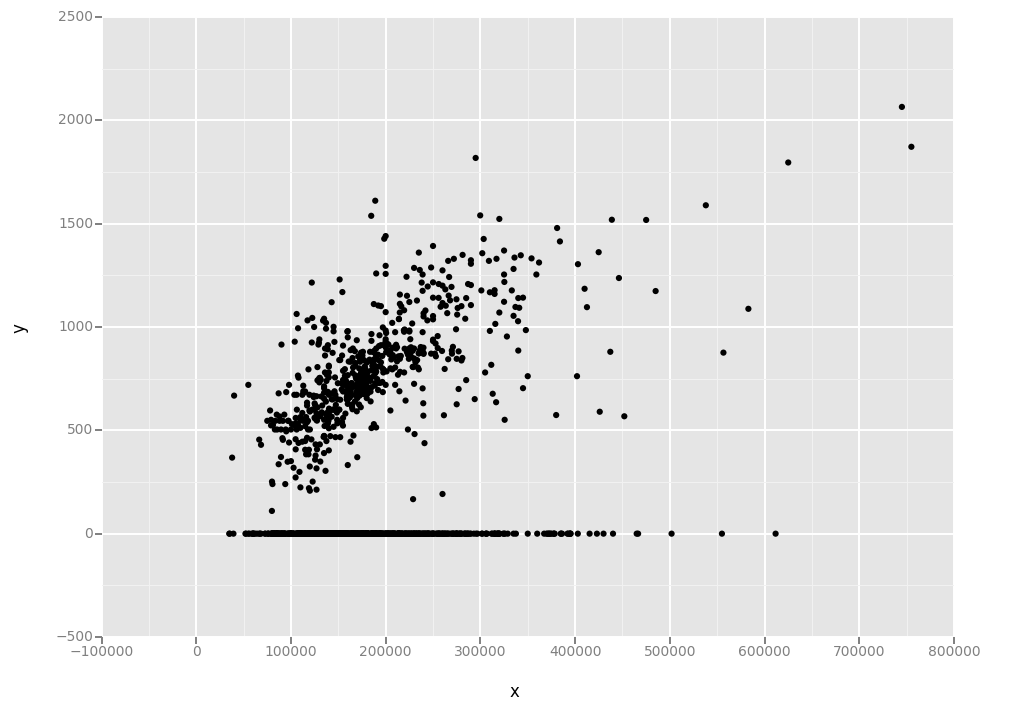

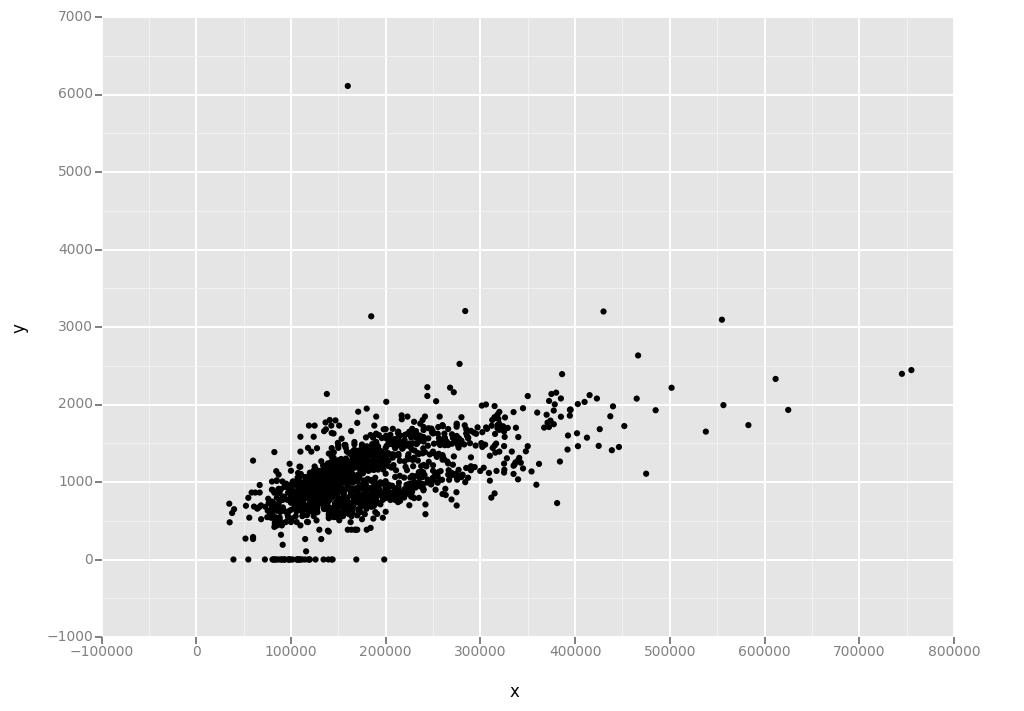

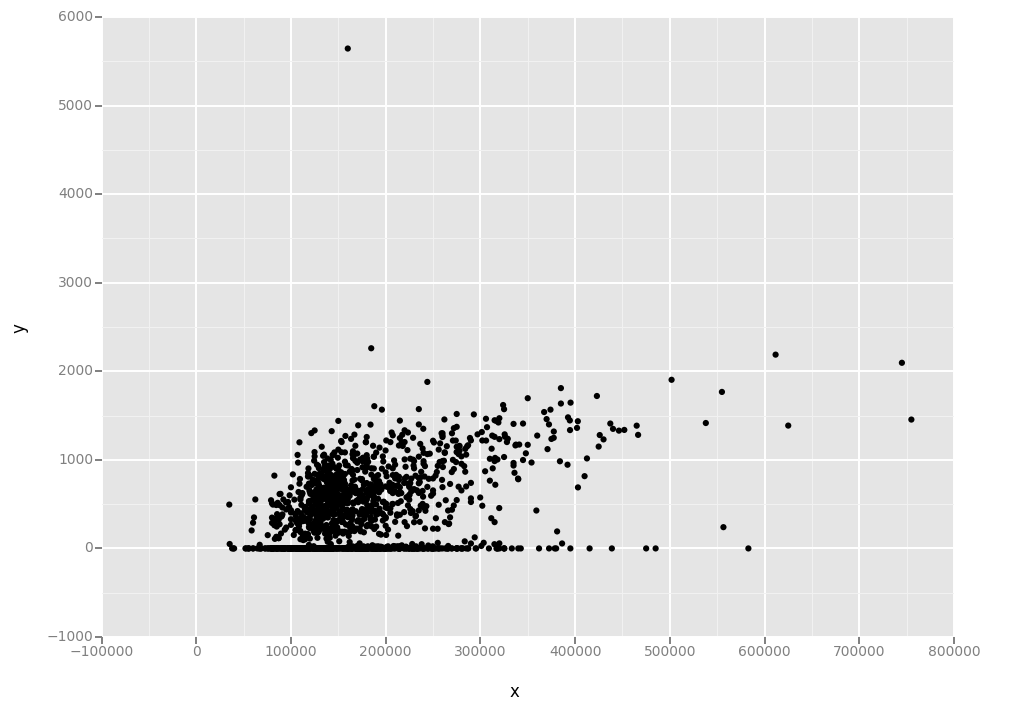

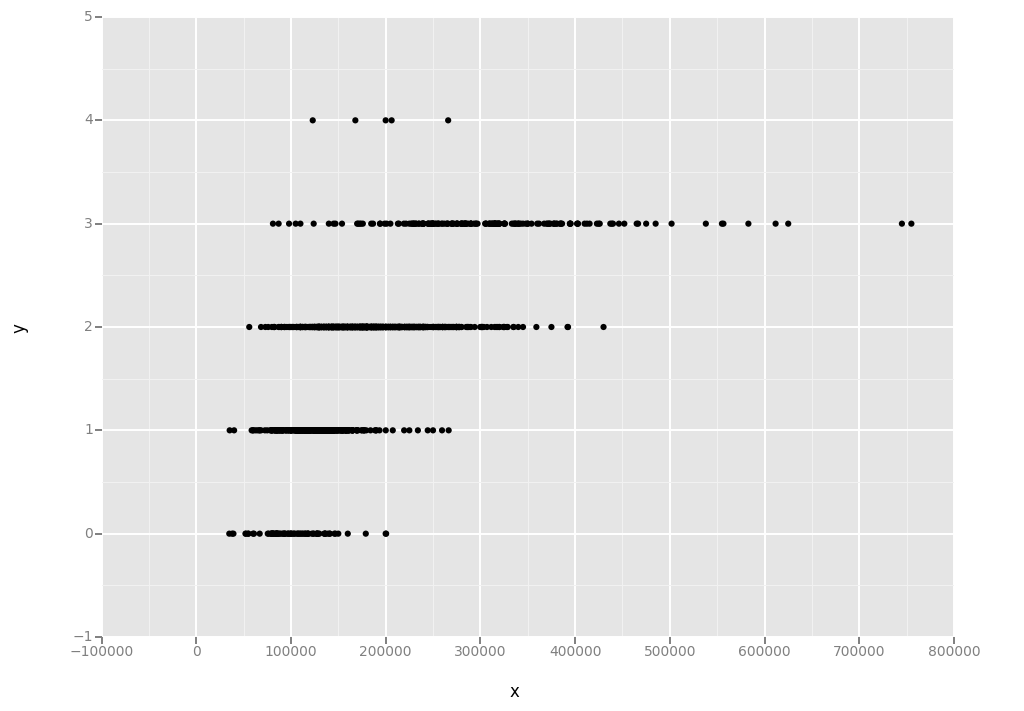

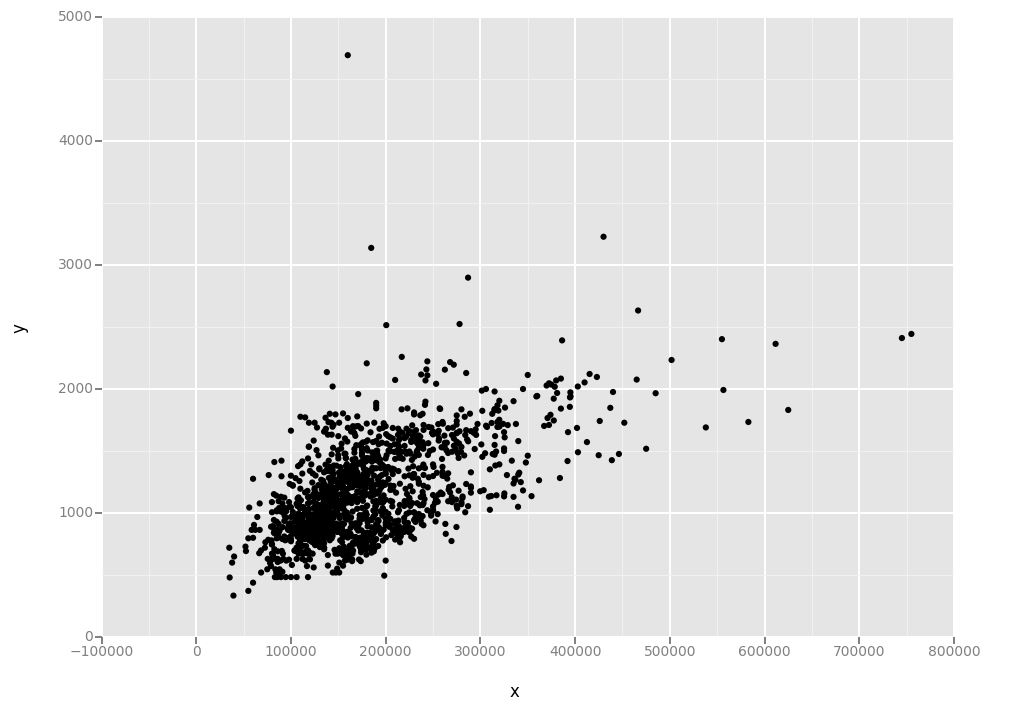

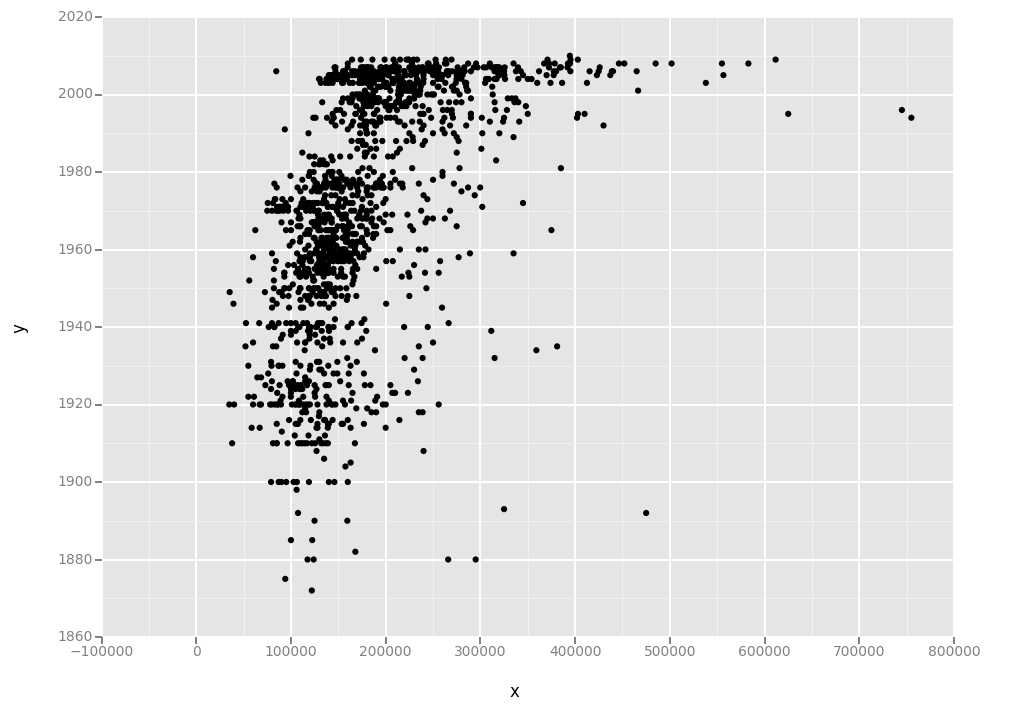

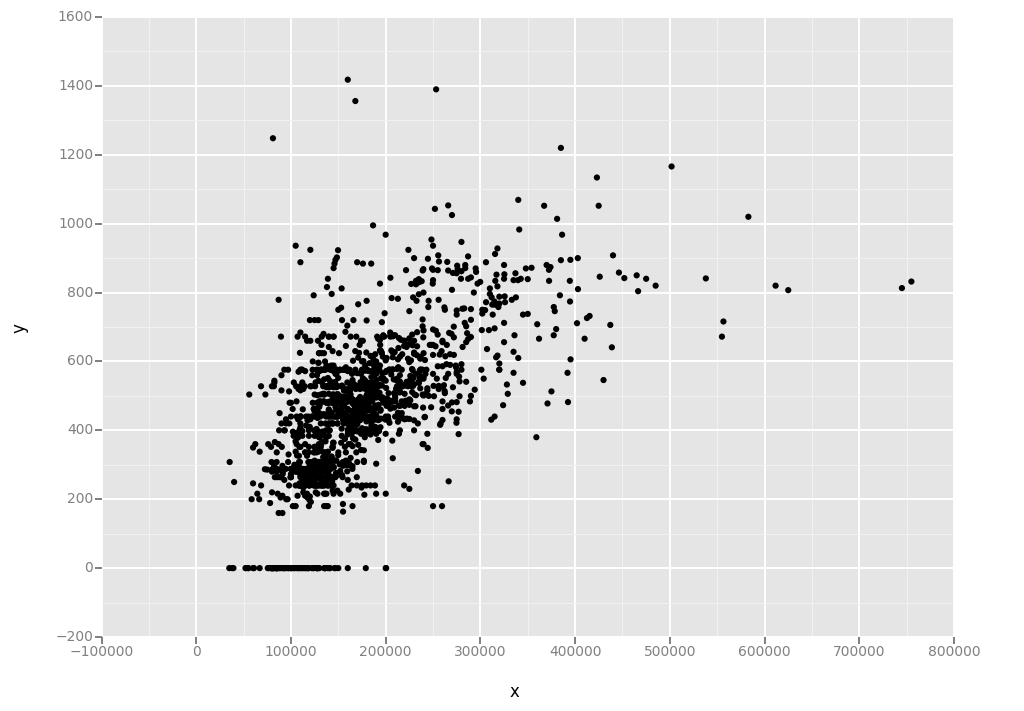

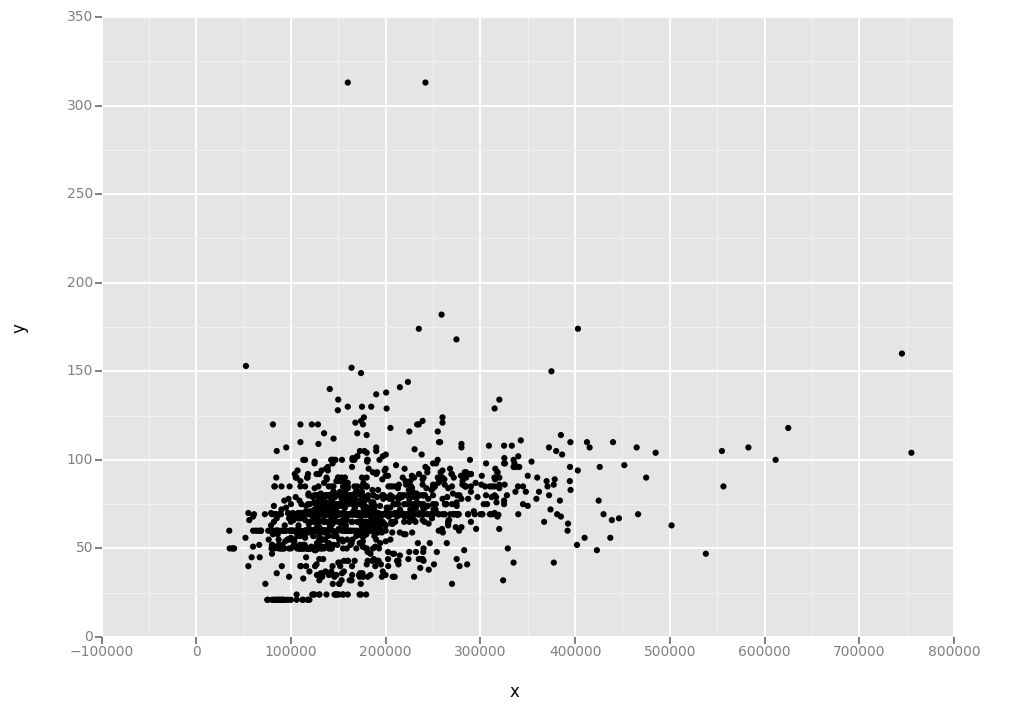

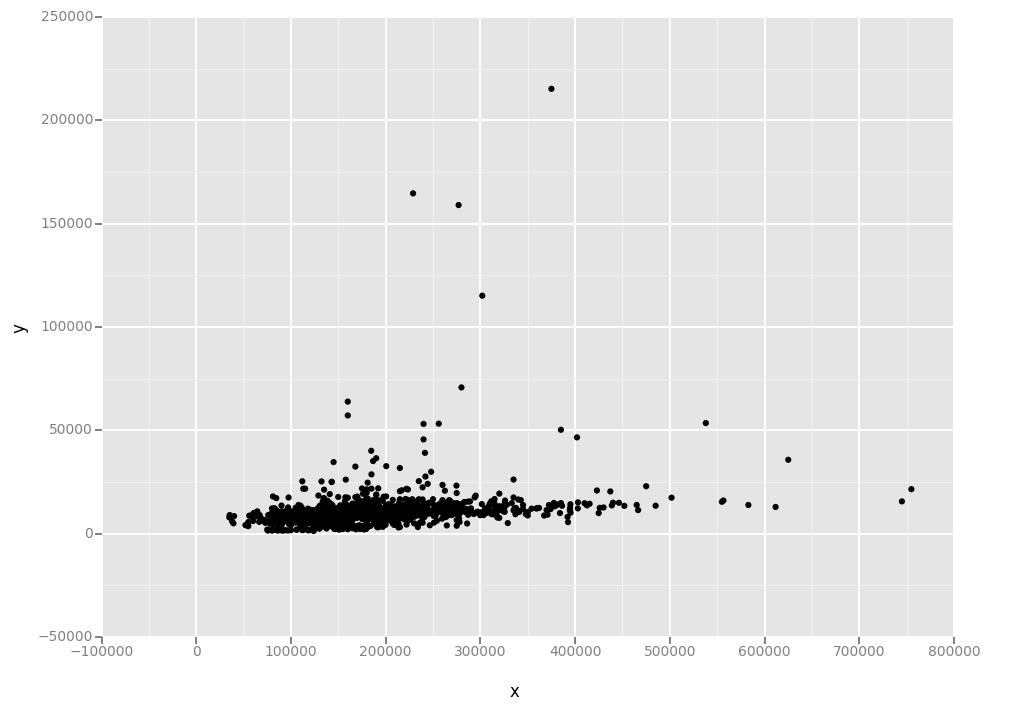

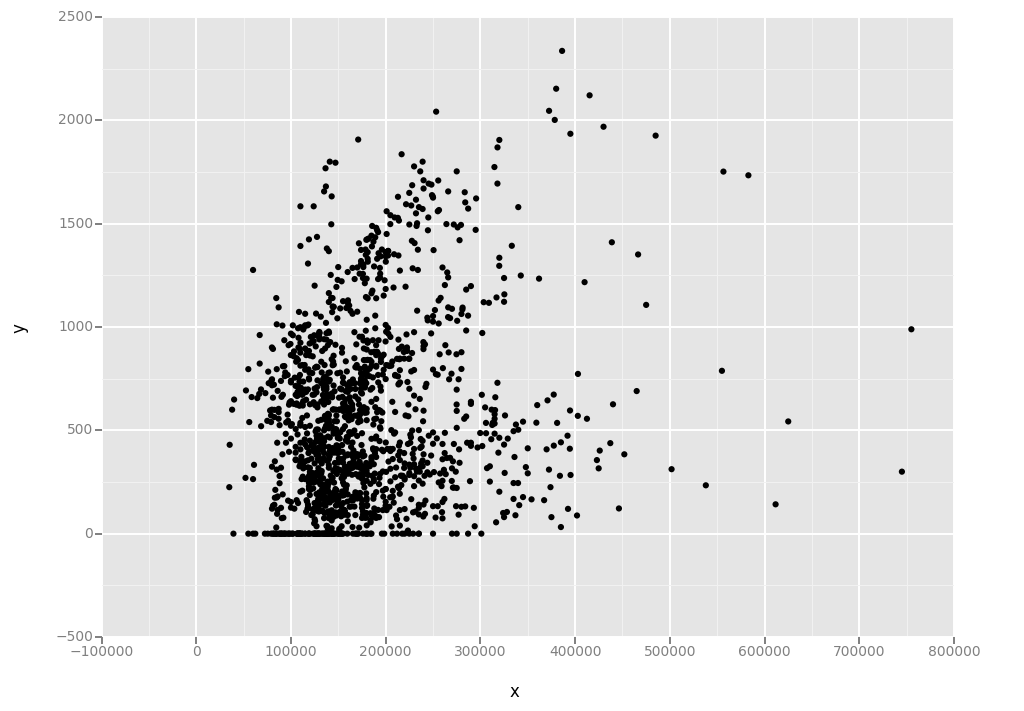

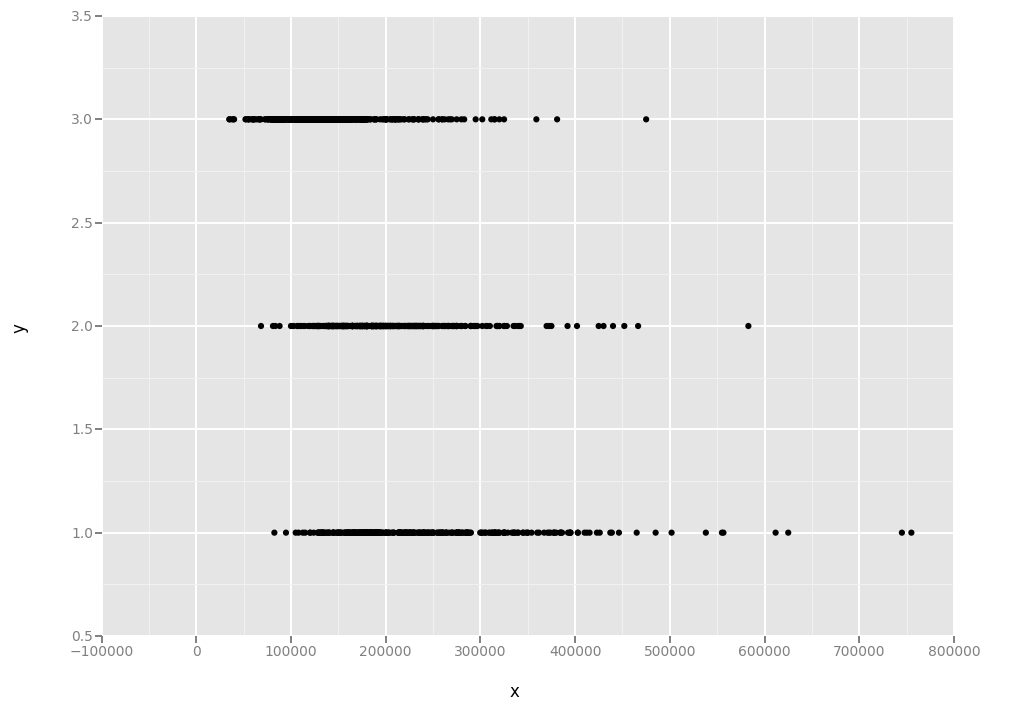

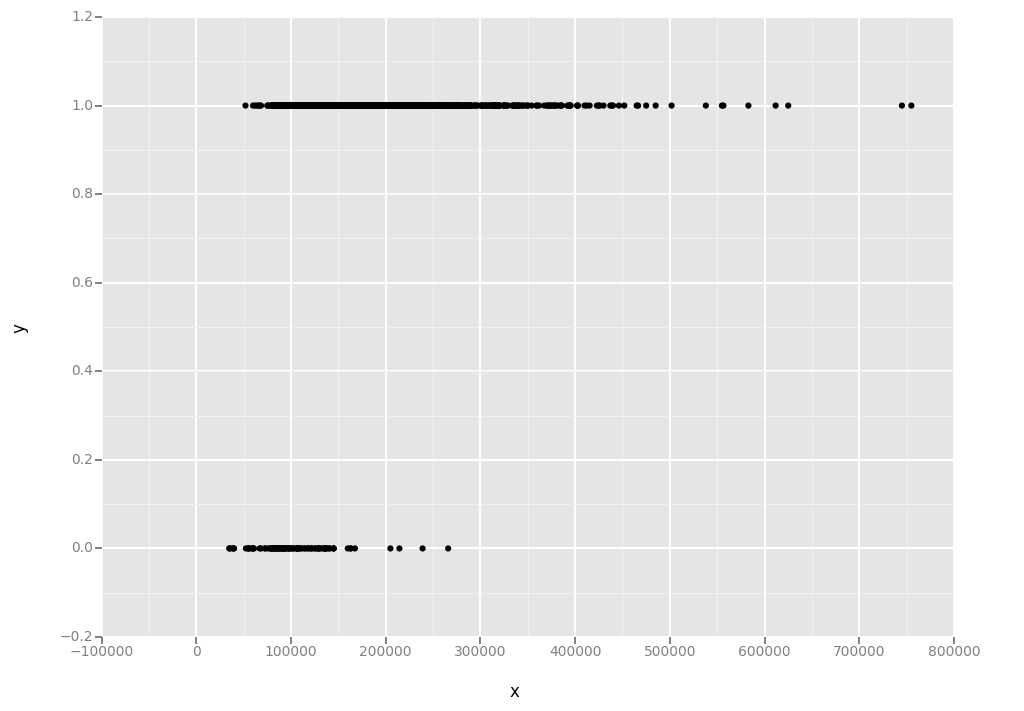

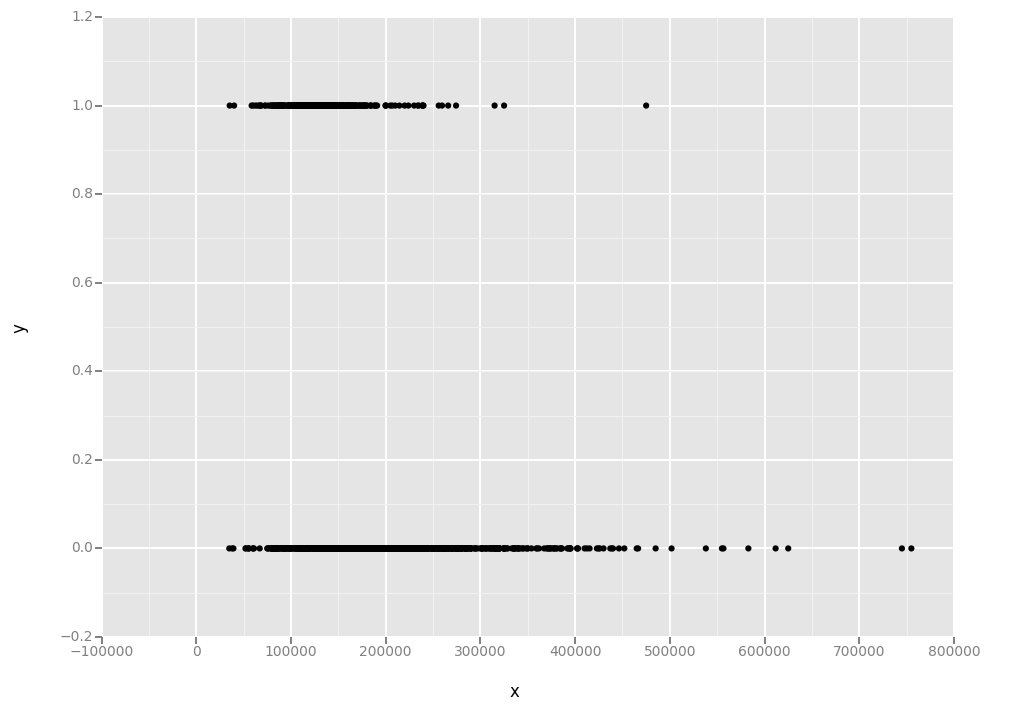

In [148]:
for i in names[1:][sort][:15]:
    gg.qplot(x=data['SalePrice'],y=data[i]).show()

In [11]:
from sklearn import ensemble

n = 11
alphas = range(1,10)
scores = [0]*n

for i,alpha in enumerate(alphas):
    fitter = ensemble.GradientBoostingRegressor(
    n_estimators=500,max_depth=int(alpha),learning_rate=0.005, random_state=1337)
    scores[i] = cross_val_score(fitter,features,labels,cv=4,scoring='neg_mean_squared_error',n_jobs=4).mean()
    print(alpha,scores[i])
    
print(max(scores))
gg.qplot(x=alphas,y=scores) + gg.scale_x_log()
    #print("RMSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

1 -0.284705698934
2 -0.176482944385
3 -0.142138395618
4 -0.129329703606
5 -0.125919828625
6 -0.123687631237
7 -0.129590429946
8 -0.142704992884
9 -0.14982422018
0


ValueError: Length of values does not match length of index

In [55]:
fitter = ensemble.GradientBoostingRegressor(
    n_estimators=1800,max_leaf_nodes=10,learning_rate=0.005, random_state=1337, loss='ls')
fitter.fit(features,labels)

to_predict = pd.DataFrame.from_csv("cleaned_test.csv")
# apply transformations
to_predict = to_predict.drop(train_original.columns[deselected],axis=1)
to_predict_matrix = to_predict.as_matrix()
to_predict_matrix = scaler.transform(to_predict_matrix)

In [56]:
features = to_predict_matrix[:,1:]
labels = fitter.predict(features)
prices = scaler.inverse_transform(np.insert(features,0,labels,axis=1))

In [57]:
to_predict['SalePrice'] = prices
to_predict[['SalePrice']].to_csv("submission.csv")